In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ISMAIMZ\OneDrive - Hapag-Lloyd AG\Documents\Books\Projects\Churn Prediction\archive\customer_churn.csv")

print(df.shape)
print(df.columns)
df.head(3)

(900, 10)
Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Names            900 non-null    object  
 1   Age              900 non-null    float64 
 2   Total_Purchase   900 non-null    float64 
 3   Account_Manager  900 non-null    int64   
 4   Years            900 non-null    float64 
 5   Num_Sites        900 non-null    float64 
 6   Onboard_date     900 non-null    object  
 7   Location         900 non-null    object  
 8   Company          900 non-null    object  
 9   Churn            900 non-null    int64   
 10  Year_buckets     899 non-null    category
dtypes: category(1), float64(4), int64(2), object(4)
memory usage: 71.5+ KB


In [5]:
df.isna().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [8]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.833333
1    0.166667
Name: proportion, dtype: float64

In [9]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


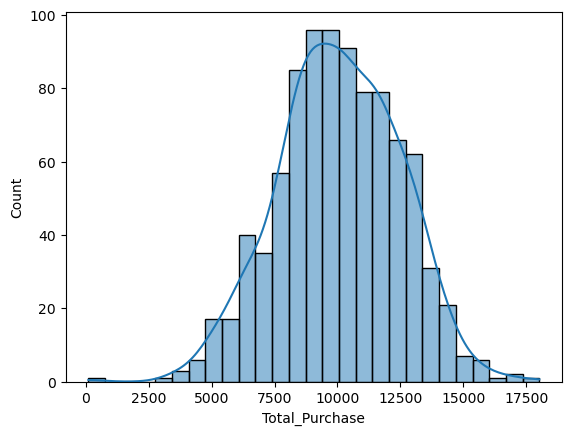

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Total_Purchase'], kde=True)
plt.show()

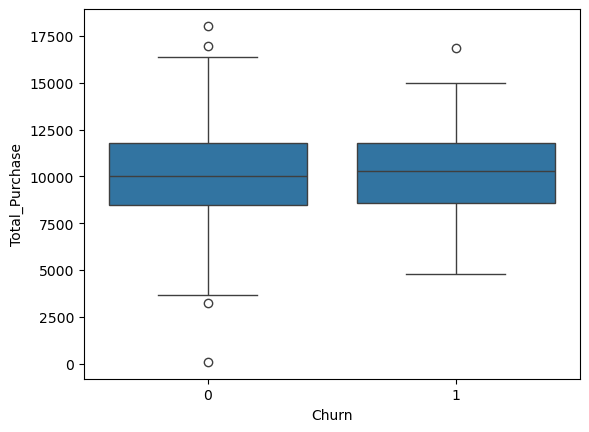

In [11]:
sns.boxplot(x='Churn', y='Total_Purchase', data=df)
plt.show()

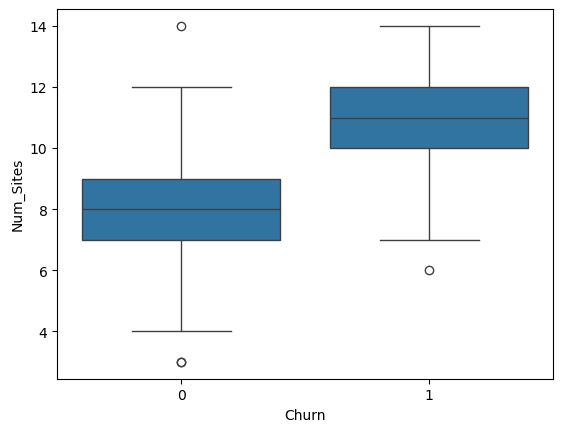

In [12]:
sns.boxplot(x='Churn', y='Num_Sites', data=df)
plt.show()

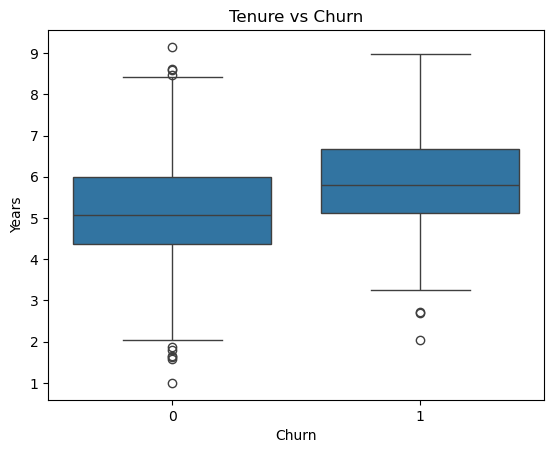

In [13]:
sns.boxplot(x='Churn', y='Years', data=df)
plt.title("Tenure vs Churn")
plt.show()

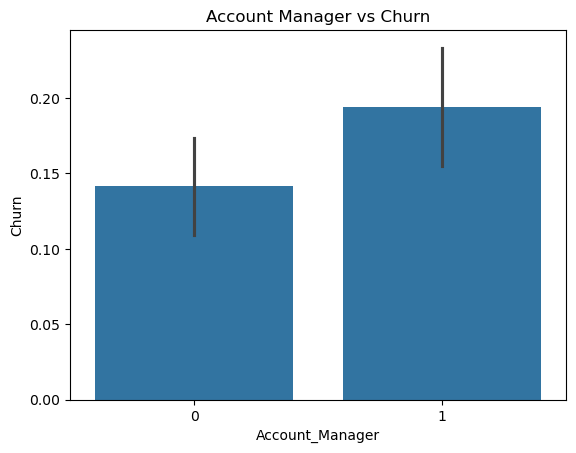

In [14]:
sns.barplot(x='Account_Manager', y='Churn', data=df) 
plt.title("Account Manager vs Churn") 
plt.show()

“Analysis showed churn peaks at mid-tenure (3–6 years), highlighting the need for retention strategies during this critical lifecycle stage.”

“Unexpectedly, customers with account managers churned more, suggesting that current customer success programs are reactive and require redesign.”

In [18]:
df['Year_buckets'] = pd.cut(df['Years'], bins=[0,3,5,7,9], labels=['0-3','3-5','5-7','7-9'])

tenure_churn = df.groupby('Year_buckets')['Churn'].mean()
print(tenure_churn)

Year_buckets
0-3    0.071429
3-5    0.085546
5-7    0.210291
7-9    0.338028
Name: Churn, dtype: float64


C:\Users\ISMAIMZ\AppData\Local\Temp\ipykernel_8900\1712082569.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('Year_buckets')['Churn'].mean()


In [19]:
manager_churn = df.groupby('Account_Manager')['Churn'].mean()
print(manager_churn)

Account_Manager
0    0.141328
1    0.193995
Name: Churn, dtype: float64


“Churn analysis revealed that risk increases with tenure, peaking at 33.8% for customers with 7–9 years of service, highlighting the need for mid-lifecycle retention strategies.”

“Unexpectedly, customers with account managers churned more (19.4% vs 14.1%), suggesting that current customer success programs are reactive and require redesign.”